# Problem Statement:-
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and sex.
Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 32560 rows and 15columns present in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are no null values present in the datset

In [5]:
for c in df.columns:
    print(df[c].value_counts())
    print('\n','*'*111)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

 ***************************************************************************************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 ***************************************************************************************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

 ***************************************************************************************************************
 HS-grad         10501
 Some-college     7291
 Bachelo

In [6]:
# we can observe that some of the columns have '?' in them.

In [7]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

 columns 'Workclass', 'Occupation' and 'Native_country' have '?' in them. Let's deal with it.

In [8]:
df=df.replace(' ?',np.NaN)

In [9]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

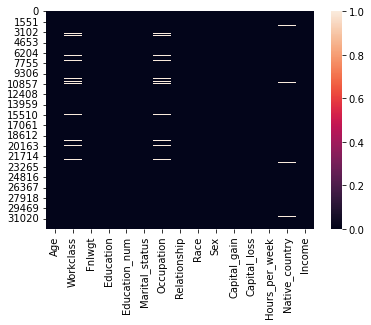

In [10]:
sns.heatmap(df.isna())

In [11]:
df.duplicated().sum()

24

There are 24 duplicated values present in the  dataset, so we will remove them.

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset now.

In [14]:
df.shape

(32536, 15)

In [15]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [17]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [18]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values present in the dataset now.

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24509,10494,14970,5979,13187,27794,21774,29734,24697


In [21]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536,3.253600e+04,32536,32536.000000,32536,32536,32536,32536,32536,32536.000000,32536.000000,32536.000000,32536,32536
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24509,NaN,10494,NaN,14970,5979,13187,27794,21774,NaN,NaN,NaN,29734,24697
mean,38.585536,NaN,1.897843e+05,NaN,10.081725,NaN,NaN,NaN,NaN,NaN,1078.410069,87.370912,40.440343,NaN,NaN
std,13.638193,NaN,1.055563e+05,NaN,2.571622,NaN,NaN,NaN,NaN,NaN,7388.068465,403.107737,12.347079,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.369932e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [22]:
c=[]
n=[]
for a in df.dtypes.index:
    if df.dtypes[a]=='object':
        c.append(a)
    else:
        n.append(a)
        
print(c,'\n')
print(n)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income'] 

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# Data Visualisation

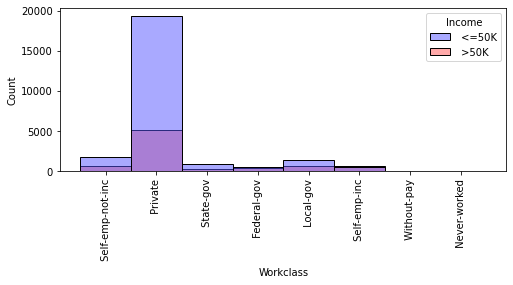

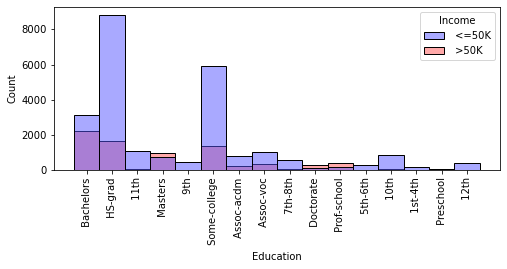

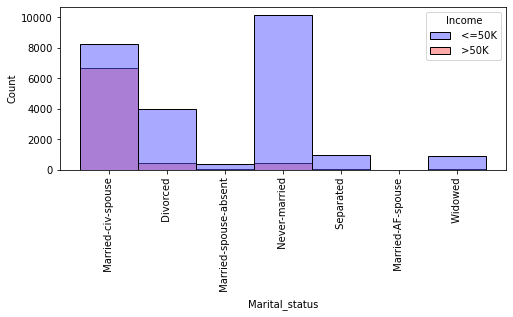

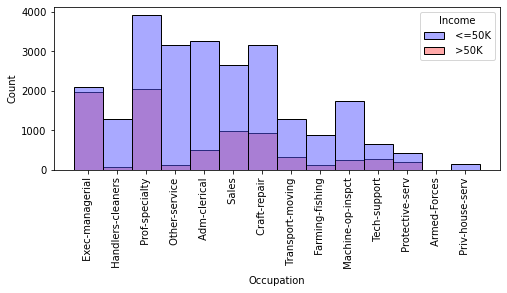

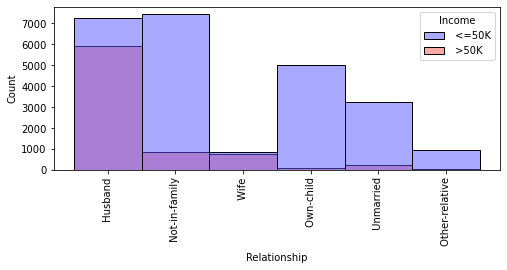

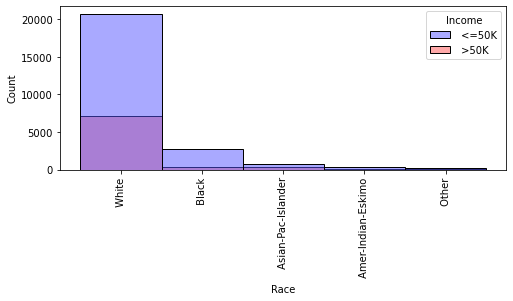

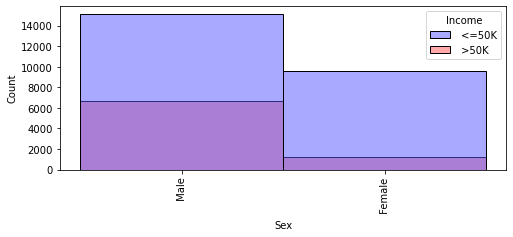

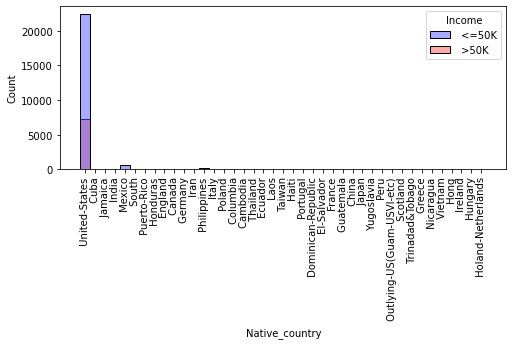

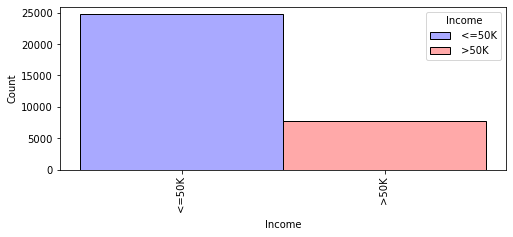

In [23]:
for i in c:
    plt.figure(figsize=(8,3))
    sns.histplot(x=df[i],palette='seismic',hue=df['Income'])
    plt.xticks(rotation=90)
    plt.show()

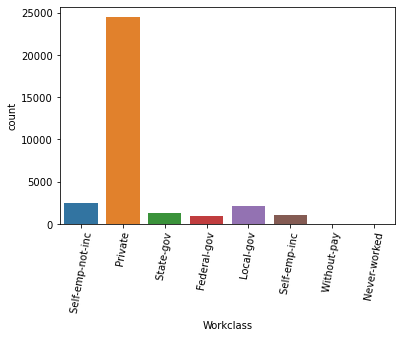

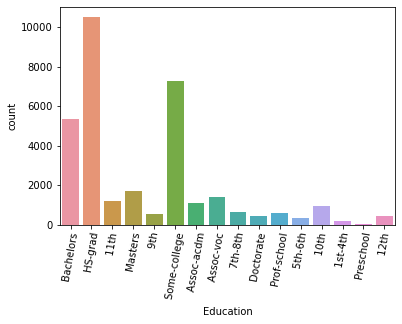

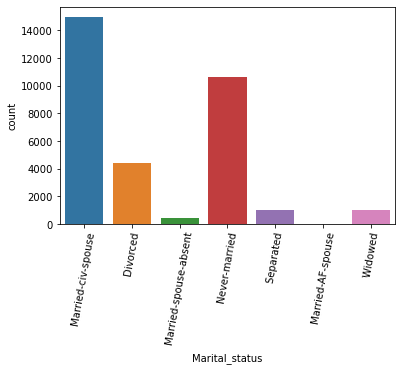

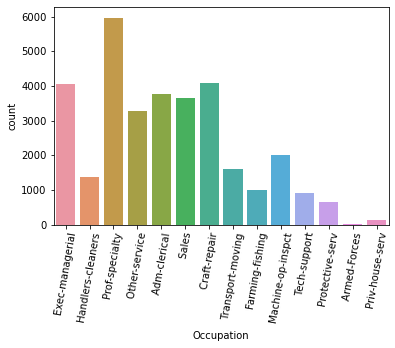

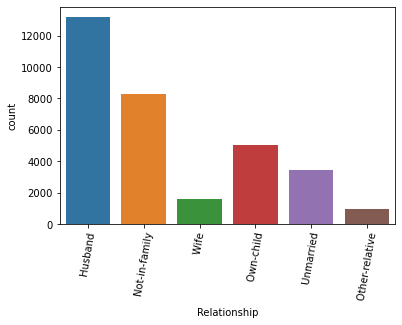

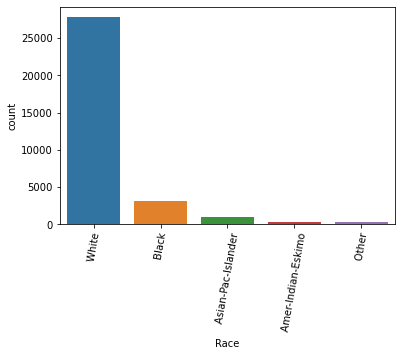

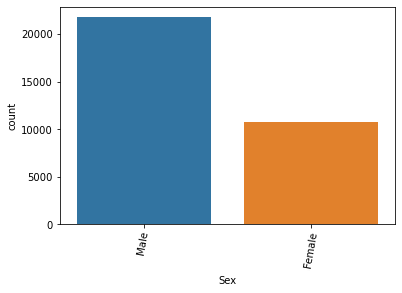

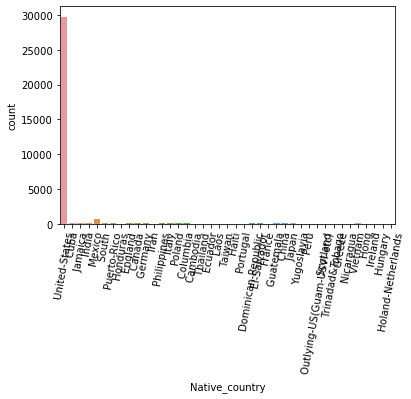

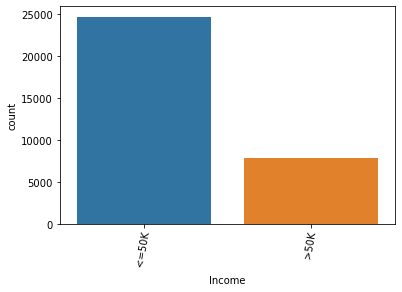

In [24]:
for a in df[c]:
    sns.countplot(df[a])
    plt.xticks(rotation=80)
    plt.show()

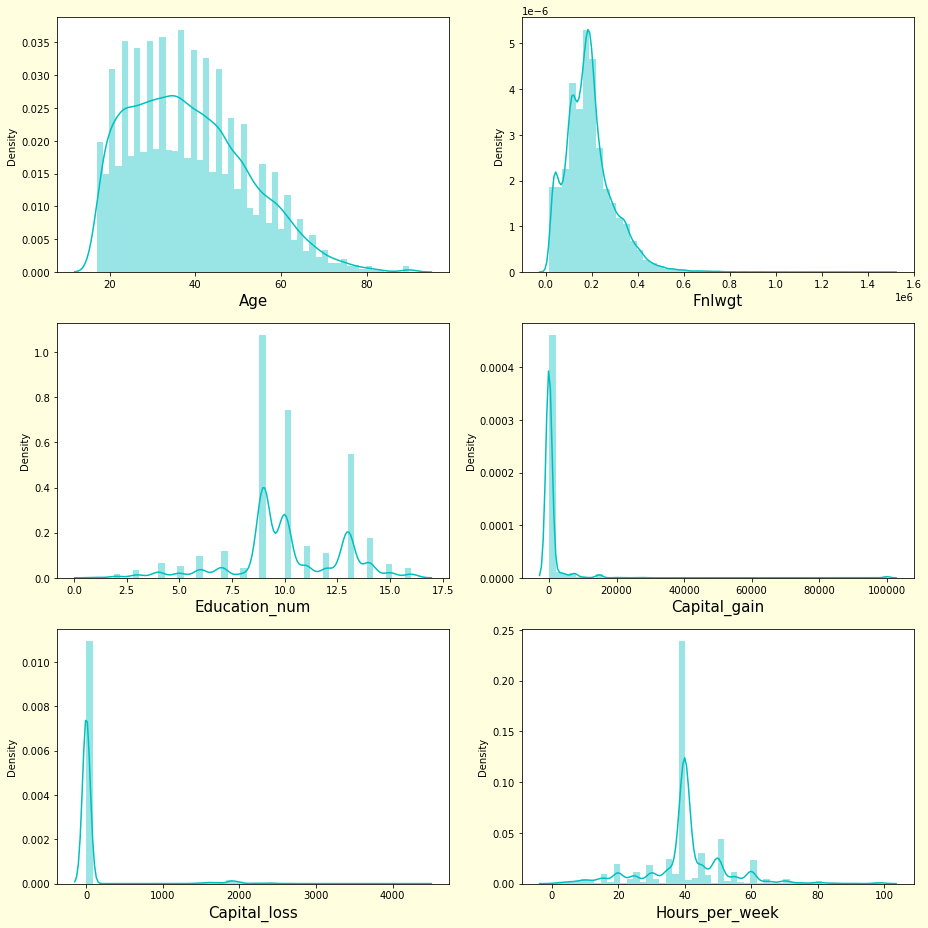

In [25]:
plt.figure(figsize=(13,13),facecolor='lightyellow')
pltn=1
for col in n:
    if pltn<=6:
        ax=plt.subplot(3,2,pltn)
        sns.distplot(df[col],color='c')
        plt.xlabel(col,fontsize=15)
    pltn+=1
plt.tight_layout()

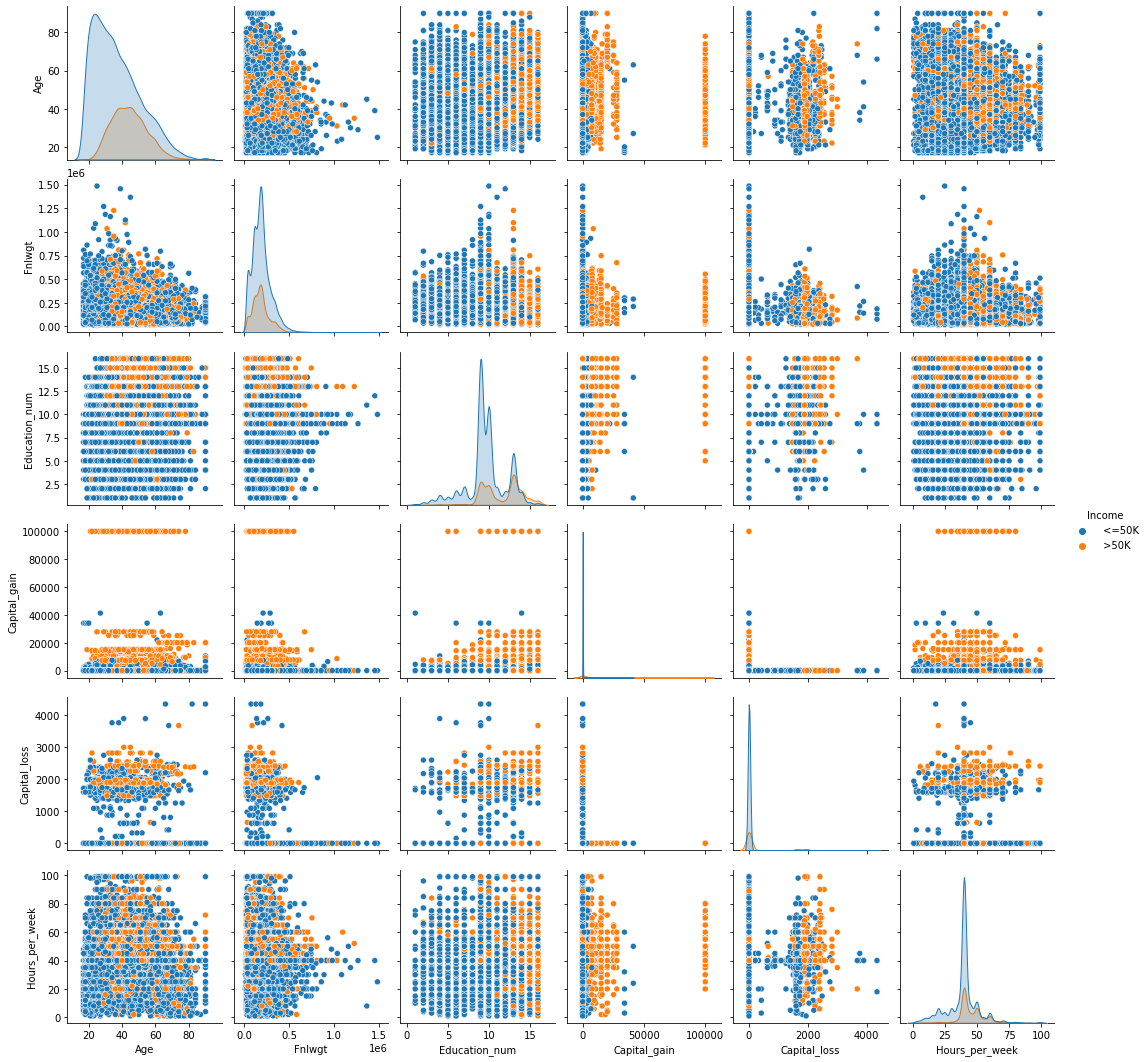

In [27]:
sns.pairplot(data=df,hue='Income')

# Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Income']= le.fit_transform(df['Income'])

In [29]:
c

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']])

OrdinalEncoder()

In [31]:
df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]=oe.transform(df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  int64  
 1   Workclass       32536 non-null  float64
 2   Fnlwgt          32536 non-null  int64  
 3   Education       32536 non-null  float64
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  float64
 6   Occupation      32536 non-null  float64
 7   Relationship    32536 non-null  float64
 8   Race            32536 non-null  float64
 9   Sex             32536 non-null  float64
 10  Capital_gain    32536 non-null  int64  
 11  Capital_loss    32536 non-null  int64  
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  float64
 14  Income          32536 non-null  int32  
dtypes: float64(8), int32(1), int64(6)
memory usage: 4.9 MB


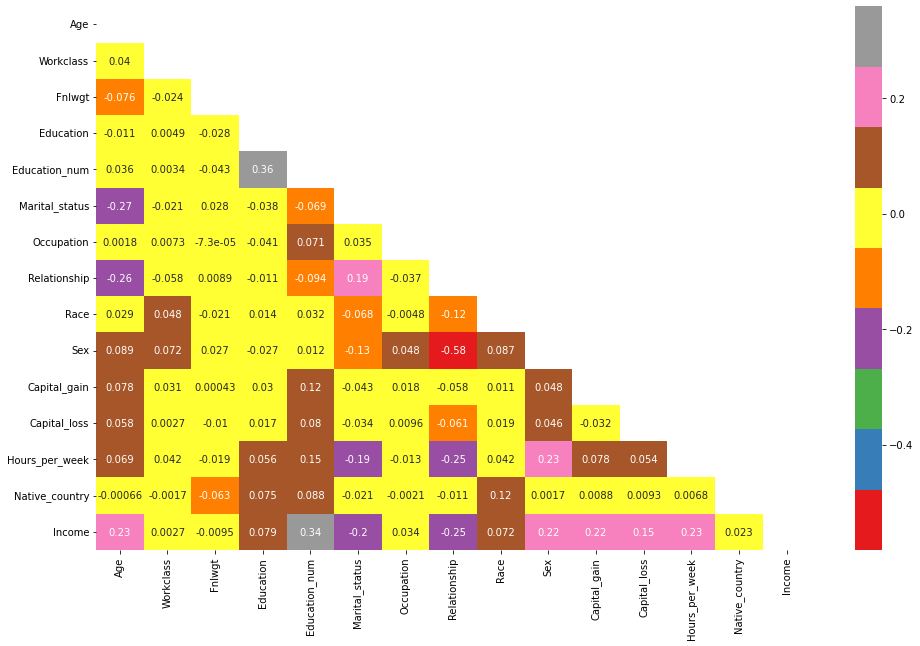

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()),cmap='Set1')
plt.show()

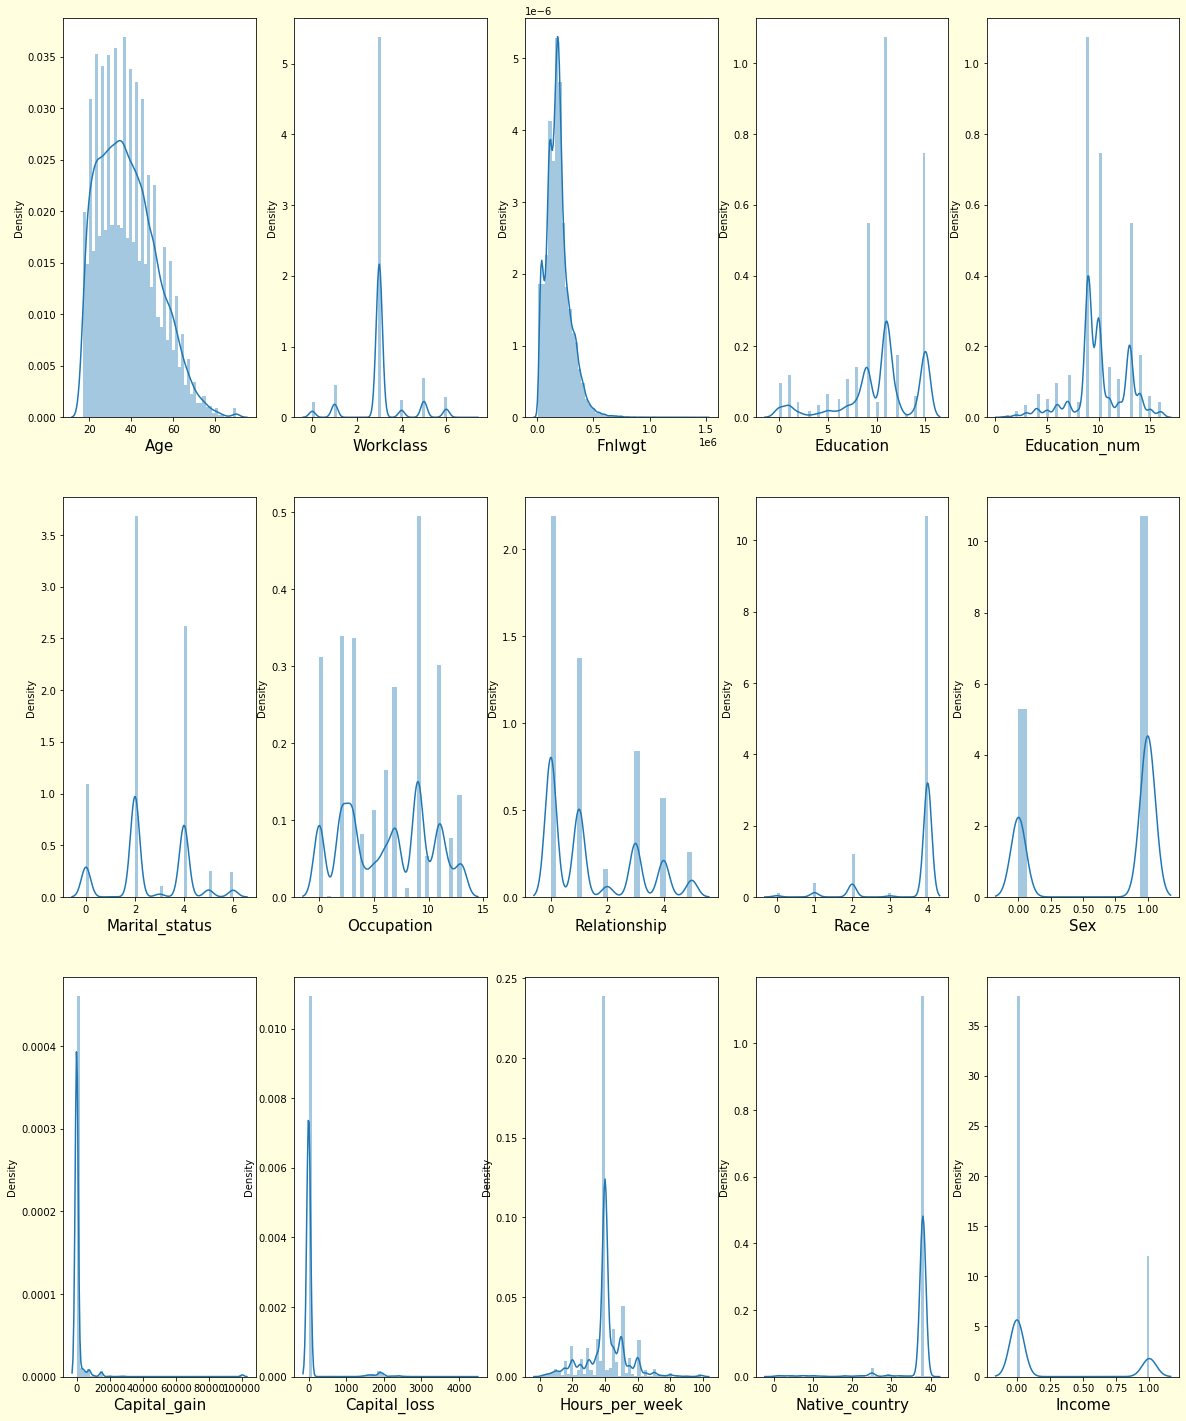

In [34]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
pltno=1

for c in df:
    if pltno<=15:
        ax=plt.subplot(3,5,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [35]:
df.skew()

Age                0.557657
Workclass          0.075983
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

There is skewness present in the dataset.

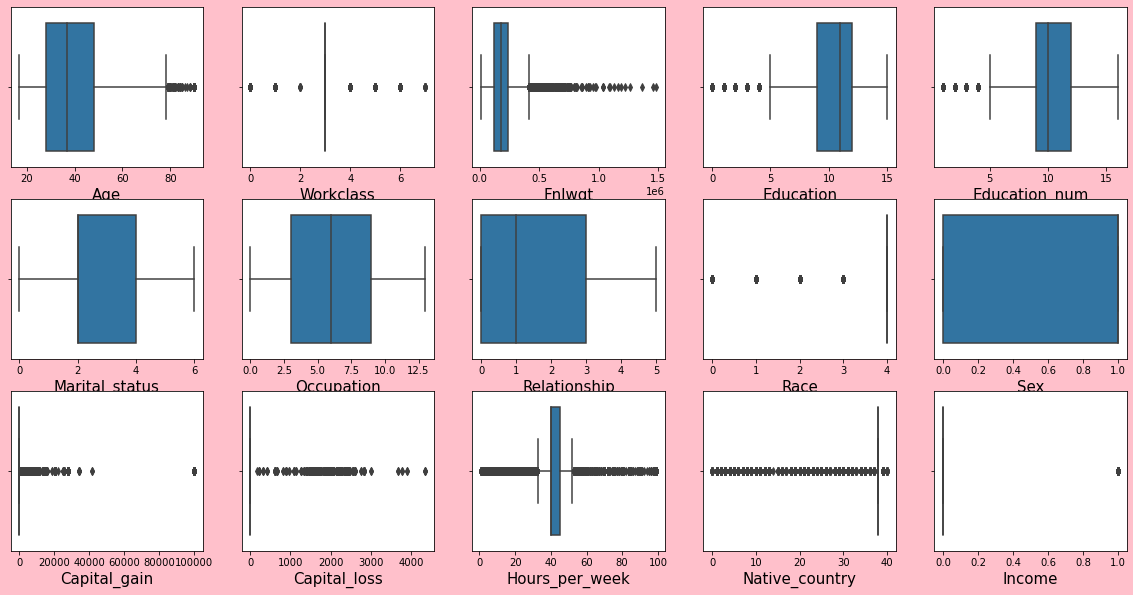

In [36]:
plt.figure(figsize=(20,10),facecolor='pink')
pn=1
for c in df:
    if pn<=15:
        ax=plt.subplot(3,5,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

There are  outliers present in the dataset

In [37]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(32536, 15)

In [38]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [39]:
 df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0


In [40]:
df.shape

(32536, 15)

In [41]:
df1.shape

(27751, 15)

In [43]:
# data loss

(32536-27751)/32536*100

14.706786328989427

the dataloss is 14.7% which is bigger than we expected, but since the dataset is big( 27751 rows and 15 columns left after removing outliers), we can afford to have 14.7% of dataloss.

In [45]:
x=df1.drop(columns=['Income'])
y=df1['Income']

In [46]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0


In [47]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27751, dtype: int32

In [48]:
x.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
dtype: float64

In [49]:
x['Capital_gain'].value_counts()

0        25499
15024      313
7688       261
7298       228
5178        91
         ...  
6097         1
1455         1
2538         1
22040        1
5060         1
Name: Capital_gain, Length: 111, dtype: int64

In [50]:
x['Capital_loss'].value_counts()

0       27706
625        12
880         6
1092        5
1258        4
653         3
213         3
323         3
1138        2
810         2
974         2
419         2
155         1
Name: Capital_loss, dtype: int64

We can observe that majority of the data in columns 'Capital_gain' and 'Capital_loss' is present in'0'. So, it will be better to remove these columns.

In [51]:
df1=df1.drop(columns=['Capital_gain','Capital_loss'])

In [54]:
x=df1.drop(columns=['Income'])
y=df1['Income']

In [55]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,40,38.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,40,38.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,16,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,20,38.0


In [56]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27751, dtype: int32

In [57]:
x.skew()

Age               0.484822
Workclass         0.081802
Fnlwgt            0.629037
Education        -0.955723
Education_num    -0.145695
Marital_status   -0.045059
Occupation        0.013496
Relationship      0.753378
Race             -2.587054
Sex              -0.688876
Hours_per_week   -0.358726
Native_country   -5.411057
dtype: float64

In [58]:
s=['Fnlwgt','Education','Relationship','Race','Native_country']

In [59]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')

In [60]:
x[s] = yj.fit_transform(x[s].values)

In [61]:
x.skew()

Age               0.484822
Workclass         0.081802
Fnlwgt           -0.034345
Education        -0.313533
Education_num    -0.145695
Marital_status   -0.045059
Occupation        0.013496
Relationship      0.109747
Race             -2.524407
Sex              -0.688876
Hours_per_week   -0.358726
Native_country    1.803667
dtype: float64

# Standard scalling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[ 0.8841087 ,  1.73868478, -1.1267133 , ...,  0.71323102,
        -2.41639486,  0.15998829],
       [-0.01174249, -0.07717964,  0.41298569, ...,  0.71323102,
         0.00623378,  0.15998829],
       [ 1.1080715 , -0.07717964,  0.59330182, ...,  0.71323102,
         0.00623378,  0.15998829],
       ...,
       [ 1.48134283, -0.07717964, -0.24938377, ..., -1.40207026,
         0.00623378,  0.15998829],
       [-1.20621075, -0.07717964,  0.27447263, ...,  0.71323102,
        -1.78830596,  0.15998829],
       [ 1.03341723,  0.83075257,  1.06405104, ..., -1.40207026,
         0.00623378,  0.15998829]])

In [63]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [64]:
xx

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.884109,1.738685,-1.126713,-0.489520,1.212364,-0.404580,-0.776933,-1.107564,0.348145,0.713231,-2.416395,0.159988
1,-0.011742,-0.077180,0.412986,0.077963,-0.440797,-1.721355,-0.276482,0.106450,0.348145,0.713231,0.006234,0.159988
2,1.108072,-0.077180,0.593302,-2.073381,-1.267378,-0.404580,-0.276482,-1.107564,-2.875664,0.713231,0.006234,0.159988
3,-0.086397,-0.077180,1.035679,0.382885,1.625655,-0.404580,-0.776933,1.549656,0.348145,-1.402070,0.006234,0.159988
4,0.809454,-0.077180,-0.157082,-1.225409,-2.093959,0.253808,0.223968,0.106450,-2.875664,-1.402070,-2.147214,-4.443319
...,...,...,...,...,...,...,...,...,...,...,...,...
27746,-0.832939,-0.077180,0.798420,-0.996494,0.799074,-0.404580,1.475095,1.549656,0.348145,-1.402070,-0.173220,0.159988
27747,0.137566,-0.077180,-0.221674,0.077963,-0.440797,-0.404580,-0.026257,-1.107564,0.348145,0.713231,0.006234,0.159988
27748,1.481343,-0.077180,-0.249384,0.077963,-0.440797,2.228971,-1.527609,1.344304,0.348145,-1.402070,0.006234,0.159988
27749,-1.206211,-0.077180,0.274473,0.077963,-0.440797,0.912196,-1.527609,1.075858,0.348145,0.713231,-1.788306,0.159988


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [66]:
vif

,Vif values,features
0,1.212258,Age
1,1.009860,Workclass
2,1.025280,Fnlwgt
3,1.098048,Education
4,1.154912,Education_num
5,1.161156,Marital_status
6,1.016183,Occupation
7,1.911787,Relationship
8,1.047888,Race
9,1.638499,Sex


All vif values are under 10.

In [67]:
y.value_counts()

0    21527
1     6224
Name: Income, dtype: int64

In [68]:
# Target variable is imbalanced

In [69]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=44)
train_x,train_y=smt.fit_resample(xx,y)
train_y.value_counts()

0    21527
1    21527
Name: Income, dtype: int64

In [70]:
df_new=pd.DataFrame(data=train_x)
df_new['Income']=train_y
ndf=df_new
ndf

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.884109,1.738685,-1.126713,-0.489520,1.212364,-0.404580,-0.776933,-1.107564,0.348145,0.713231,-2.416395,0.159988,0
1,-0.011742,-0.077180,0.412986,0.077963,-0.440797,-1.721355,-0.276482,0.106450,0.348145,0.713231,0.006234,0.159988,0
2,1.108072,-0.077180,0.593302,-2.073381,-1.267378,-0.404580,-0.276482,-1.107564,-2.875664,0.713231,0.006234,0.159988,0
3,-0.086397,-0.077180,1.035679,0.382885,1.625655,-0.404580,-0.776933,1.549656,0.348145,-1.402070,0.006234,0.159988,0
4,0.809454,-0.077180,-0.157082,-1.225409,-2.093959,0.253808,0.223968,0.106450,-2.875664,-1.402070,-2.147214,-4.443319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43049,-0.516869,-0.077180,0.274789,-0.489520,1.212364,-0.404580,0.724419,-1.107564,0.348145,0.713231,-0.165640,0.159988,1
43050,0.140951,-0.077180,1.304960,-0.750917,0.385783,-0.404580,-0.776933,-1.107564,0.348145,0.713231,0.271346,0.159988,1
43051,-0.184667,-1.893044,0.233279,1.376709,-0.027507,-0.404580,0.974645,-1.107564,0.348145,0.713231,1.645130,0.159988,1
43052,1.356770,-0.077180,-1.234471,0.077963,-0.440797,-0.404580,-0.818387,-1.107564,0.348145,0.713231,0.006234,0.159988,1


In [71]:
x=ndf.drop(columns=['Income'])
y=ndf['Income']

# Model Building

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]


In [75]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(10,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.7721107395020439 on random state 15


In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=15,test_size=.25)

In [77]:
for m in models:
    m.fit(xtrain,ytrain)
    m.score(x_train,y_train)
    predm=m.predict(xtest)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(ytest,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(ytest,predm))
    print ('\n','Classification Report:','\n',classification_report(ytest,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*80)

 For LogisticRegression()  Accuracy score is:  0.7721107395020439

 Confusion matrix: 
 [[3994 1372]
 [1081 4317]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      5366
           1       0.76      0.80      0.78      5398

    accuracy                           0.77     10764
   macro avg       0.77      0.77      0.77     10764
weighted avg       0.77      0.77      0.77     10764

Cross Validation Score= 0.7660845249526205 

********************************************************************************
 For RandomForestClassifier()  Accuracy score is:  0.8895392047565961

 Confusion matrix: 
 [[4670  696]
 [ 493 4905]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      5366
           1       0.88      0.91      0.89      5398

    accuracy                           0.89     10764
   macro avg       0.89      0.89      0.

 As per the observation, RandomForest classifier is our best model

# Hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV
rc=RandomForestClassifier()
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25,30],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=5,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2'}

In [80]:
fmodel=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=30)

In [81]:
fmodel.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2')

In [82]:
pred=fmodel.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc*100)

89.07469342251952


  the randomforest classifier gives the accuracy of 89.07%


# Saving the model

In [83]:
import joblib
joblib.dump(fmodel,'Census_income')

['Census_income']

# Loading the model

In [84]:
m = joblib.load("Census_income")
pp=m.predict(xtest)
print(m.predict(xtest))

[0 1 1 ... 0 0 0]


In [85]:
d=pd.DataFrame({'predicted values':pp,'actual values':ytest})

In [86]:
d

,predicted values,actual values
11855,0,0
9899,1,1
31293,1,1
26220,1,0
22879,1,1
...,...,...
19502,0,1
38171,1,1
14410,0,0
19648,0,0


# ROC curve

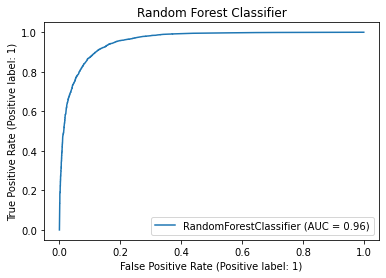

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(fmodel,xtest,ytest)
plt.title('Random Forest Classifier')
plt.show()

# Confusion matrix

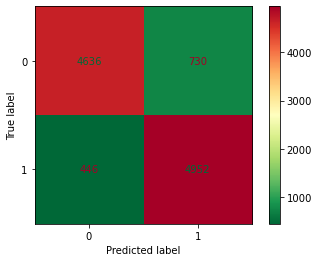

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest, pp)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='RdYlGn_r')